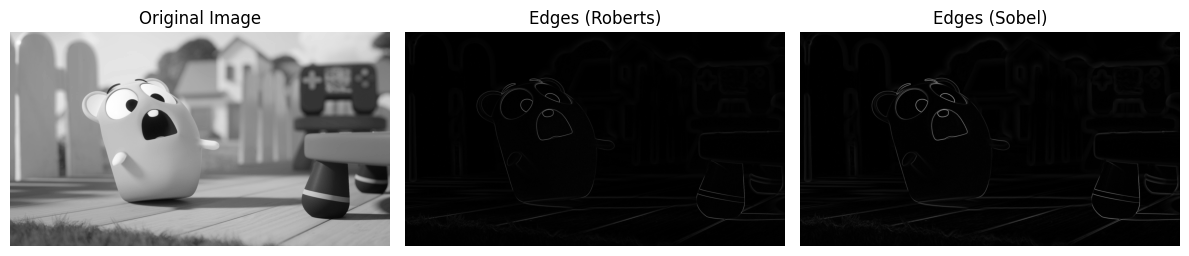

In [5]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk deteksi tepi menggunakan operator Robert
def roberts_edge_detection(image):
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])
    
    gx = np.zeros_like(image, dtype=float)
    gy = np.zeros_like(image, dtype=float)
    
    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1] - 1):
            gx[i, j] = np.sum(image[i:i+2, j:j+2] * kernel_x)
            gy[i, j] = np.sum(image[i:i+2, j:j+2] * kernel_y)
    
    return np.sqrt(gx**2 + gy**2)

# Fungsi untuk deteksi tepi menggunakan operator Sobel
def sobel_edge_detection(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    gx = np.zeros_like(image, dtype=float)
    gy = np.zeros_like(image, dtype=float)
    
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            gx[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel_x)
            gy[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel_y)
    
    return np.sqrt(gx**2 + gy**2)

# Baca gambar dalam grayscale
image = iio.imread('d:\\tugas kuliah\\pengolahan citra digital\\larva.jpg', mode='F')

# Normalize image
image = image / np.max(image)  # Normalisasi untuk memastikan nilai antara 0-1

# Deteksi tepi menggunakan Robert dan Sobel
edges_roberts = roberts_edge_detection(image)
edges_sobel = sobel_edge_detection(image)

# Visualisasi hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_roberts, cmap='gray')
plt.title('Edges (Roberts)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Edges (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()
